In [4]:
#IMPORTING LIBRARIES
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Examining Customer Data

In [3]:
customers_data = pd.read_csv("E:\\Zeotap Assignment\\Customers.csv")
customers_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [2]:
customers_data['SignupDate'].min()


'2022-01-22'

In [12]:
customers_data['Region'].unique()

array(['South America', 'Asia', 'North America', 'Europe'], dtype=object)

1. CUSTOMER DISTRIBUTION BY REGION

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count customers per region
region_counts = customers_data["Region"].value_counts()
region_counts

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

C:\Users\Arya Anil\AppData\Local\Temp\ipykernel_21416\2902983741.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")


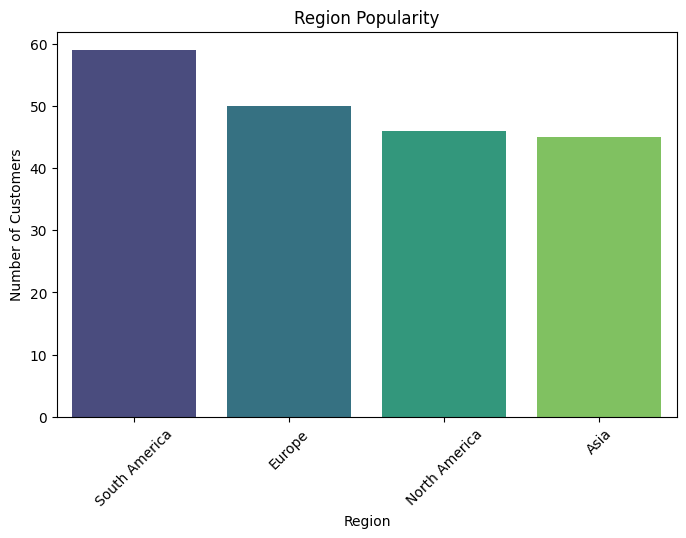

In [16]:
# Bar chart for region popularity
plt.figure(figsize=(8, 5))
sns.barplot(x=region_counts.index, y=region_counts.values, palette="viridis")
plt.title("Region Popularity")
plt.xlabel("Region")
plt.ylabel("Number of Customers")
plt.xticks(rotation=45)
plt.show()



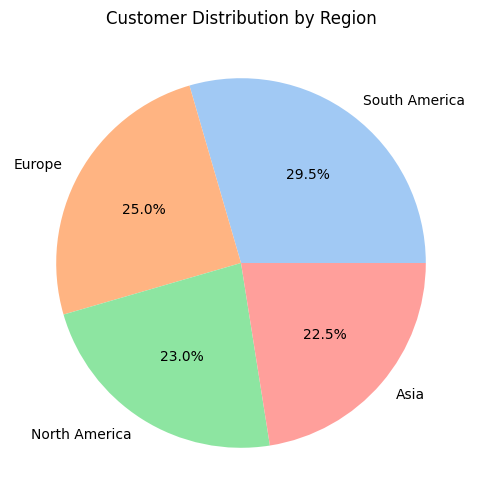

In [17]:
# Pie chart for region distribution
plt.figure(figsize=(6, 6))
region_counts.plot(kind="pie", autopct="%.1f%%", colors=sns.color_palette("pastel"))
plt.title("Customer Distribution by Region")
plt.ylabel("")  # Hide y-axis label
plt.show()

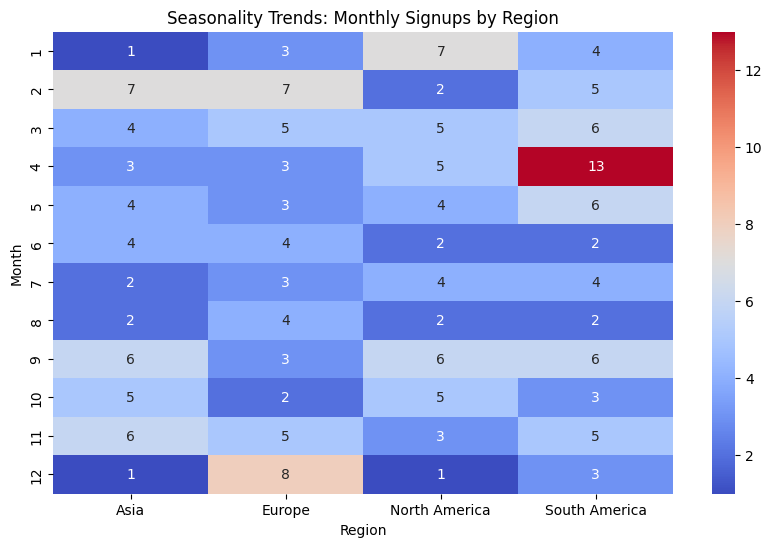

In [19]:
# Extract month and quarter
customers_data["SignupMonth"] = customers_data["SignupDate"].dt.month
customers_data["SignupQuarter"] = customers_data["SignupDate"].dt.quarter

# Group by month and region
monthly_data = customers_data.groupby(["SignupMonth", "Region"]).size().unstack(fill_value=0)

# Heatmap for seasonality trends
plt.figure(figsize=(10, 6))
sns.heatmap(monthly_data, annot=True, fmt="d", cmap="coolwarm")
plt.title("Seasonality Trends: Monthly Signups by Region")
plt.xlabel("Region")
plt.ylabel("Month")
plt.show()


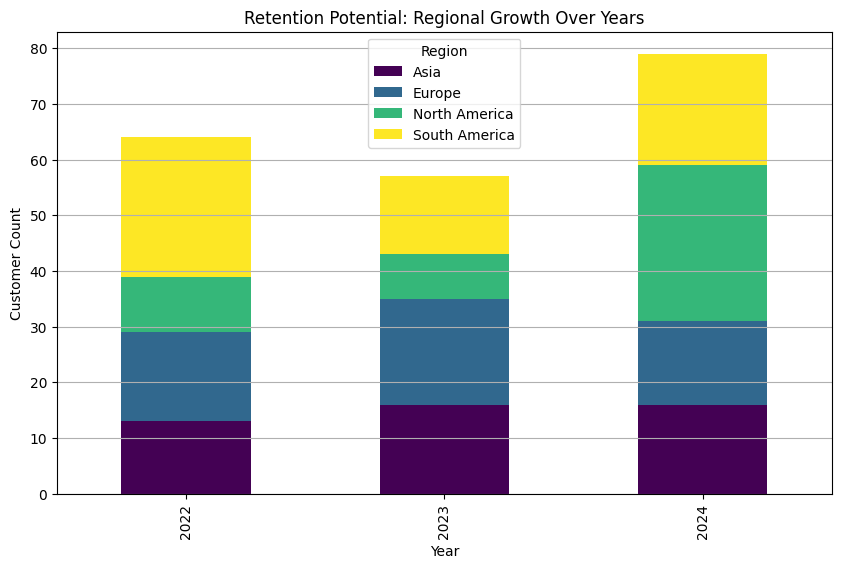

In [24]:
customers_data["SignupDate"] = pd.to_datetime(customers_data["SignupDate"])
customers_data["SignupYear"] = customers_data["SignupDate"].dt.year

# Group by year and region
region_trends = customers_data.groupby(["SignupYear", "Region"]).size().unstack(fill_value=0)

# Stacked bar chart for retention potential
region_trends.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="viridis")
plt.title("Retention Potential: Regional Growth Over Years")
plt.xlabel("Year")
plt.ylabel("Customer Count")
plt.legend(title="Region")
plt.grid(axis="y")
plt.show()


In [2]:
#Examining Products Data

In [5]:
products_data = pd.read_csv("E:\\Zeotap Assignment\\Products.csv")
products_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [28]:
products_data

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [29]:
# 1. Average Price per Category
average_price_per_category = products_data.groupby('Category')['Price'].mean()

# 2. Most Expensive Product per Category
most_expensive_per_category = products_data.loc[products_data.groupby('Category')['Price'].idxmax()]

# 3. Identify Category with Highest Average Price
highest_avg_price_category = average_price_per_category.idxmax()
highest_avg_price_value = average_price_per_category.max()

# Display the results
print("Average Price per Category:")
print(average_price_per_category)
print("\nMost Expensive Product in Each Category:")
print(most_expensive_per_category[['ProductName', 'Price']])
print(f"\nCategory with the Highest Average Price: {highest_avg_price_category} (${highest_avg_price_value})")

Average Price per Category:
Category
Books          292.212308
Clothing       263.720000
Electronics    275.353462
Home Decor     235.020000
Name: Price, dtype: float64

Most Expensive Product in Each Category:
                ProductName   Price
74         TechPro Textbook  497.76
44        SoundWave T-Shirt  481.78
36     SoundWave Smartwatch  459.86
22  ActiveWear Cookware Set  454.53

Category with the Highest Average Price: Books ($292.2123076923077)


In [7]:
#Transactions Data:

In [5]:
transactions_data = pd.read_csv("E:\\Zeotap Assignment\\Transactions - Transactions.csv")

In [6]:
transactions_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


MERGING THE 3 DATASETS TO GET A COMPLETE PICTURE

In [6]:
#MERGING DATA:

# Merging the data on CustomerID and ProductID
merged_df = transactions_data.merge(customers_data, on='CustomerID').merge(products_data, on='ProductID')

In [7]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,CustomerName,Region,SignupDate,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,Jacob Holt,South America,2022-01-22,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11,SoundWave Smartwatch,Electronics,459.86


In [59]:
#merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

#merged_df['TransactionDate'] = merged_df['TransactionDate'].dt.date
#merged_df['SignupDate'] = merged_df['SignupDate'].dt.date

In [34]:
merged_df.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'TotalValue', 'Price_x', 'CustomerName', 'Region',
       'SignupDate', 'SignupYear', 'ProductName', 'Category', 'Price_y'],
      dtype='object')

In [62]:
#Removing records for year 2023 - removing 4 entries of 2023, since we are only considering 2024.
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])
# Filter out rows where the year is 2023
merged_df = merged_df[merged_df['TransactionDate'].dt.year != 2023]

# Reset the index (optional, for a cleaner DataFrame)
merged_df = merged_df.reset_index(drop=True)

In [64]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 996 entries, 0 to 995
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    996 non-null    object        
 1   CustomerID       996 non-null    object        
 2   ProductID        996 non-null    object        
 3   TransactionDate  996 non-null    datetime64[ns]
 4   Quantity         996 non-null    int64         
 5   TotalValue       996 non-null    float64       
 6   Price_x          996 non-null    float64       
 7   CustomerName     996 non-null    object        
 8   Region           996 non-null    object        
 9   SignupDate       996 non-null    object        
 10  SignupYear       996 non-null    int32         
 11  ProductName      996 non-null    object        
 12  Category         996 non-null    object        
 13  Price_y          996 non-null    float64       
dtypes: datetime64[ns](1), float64(3), int32(1)

Sales BY Region and Year

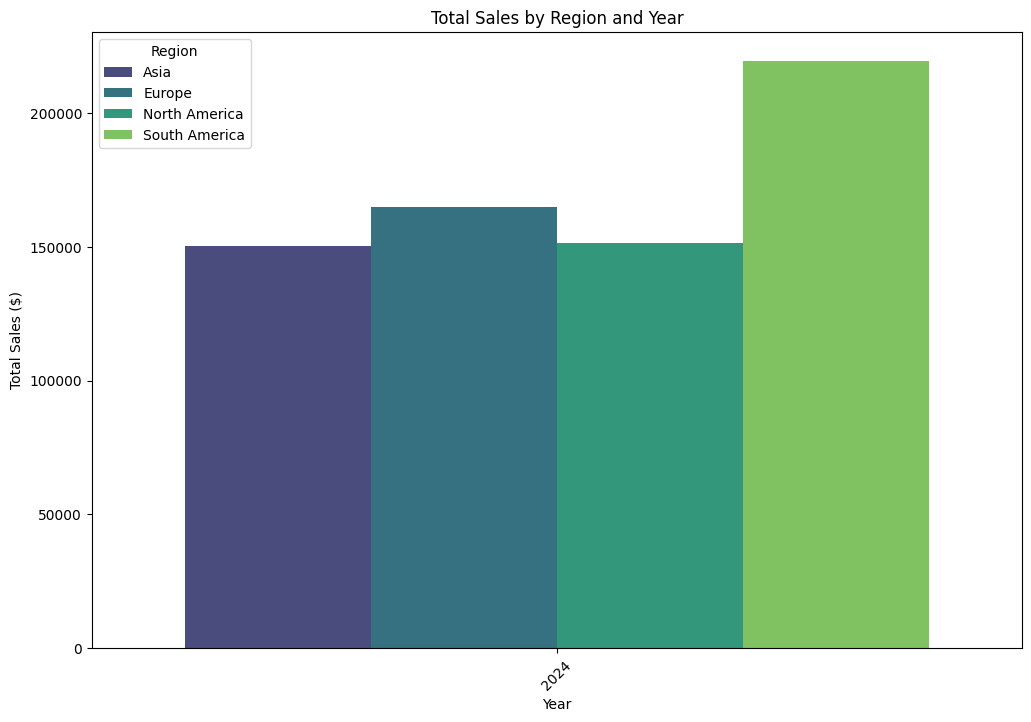

In [65]:

merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

merged_df['TransactionYear'] = merged_df['TransactionDate'].dt.year

# Calculate total sales by region and year
region_sales_year = merged_df.groupby(['Region', 'TransactionYear'])['TotalValue'].sum().reset_index()

# Plotting total sales by region and year
plt.figure(figsize=(12,8))
sns.barplot(x='TransactionYear', y='TotalValue', hue='Region', data=region_sales_year, palette='viridis')
plt.title("Total Sales by Region and Year")
plt.xlabel("Year")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()


In [8]:
#merged_df[merged_df['TransactionYear'] == 2023]

In [66]:
# Ensure TransactionDate is in datetime format
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

# Extract Quarter from TransactionDate
merged_df['Quarter'] = merged_df['TransactionDate'].dt.to_period('Q')

# Group by Region and Quarter, and calculate total sales
quarterly_sales = (
    merged_df.groupby(['Region', 'Quarter'])['TotalValue']
    .sum()
    .reset_index()
    .sort_values(by=['Region', 'Quarter'])
)

# Display the results
print(quarterly_sales)



           Region Quarter  TotalValue
0            Asia  2024Q1    38265.84
1            Asia  2024Q2    32082.57
2            Asia  2024Q3    49634.00
3            Asia  2024Q4    30507.20
4          Europe  2024Q1    42284.10
5          Europe  2024Q2    42586.48
6          Europe  2024Q3    45672.79
7          Europe  2024Q4    34438.54
8   North America  2024Q1    40538.41
9   North America  2024Q2    42852.08
10  North America  2024Q3    40730.20
11  North America  2024Q4    27281.27
12  South America  2024Q1    44576.04
13  South America  2024Q2    53296.85
14  South America  2024Q3    69369.89
15  South America  2024Q4    52109.78


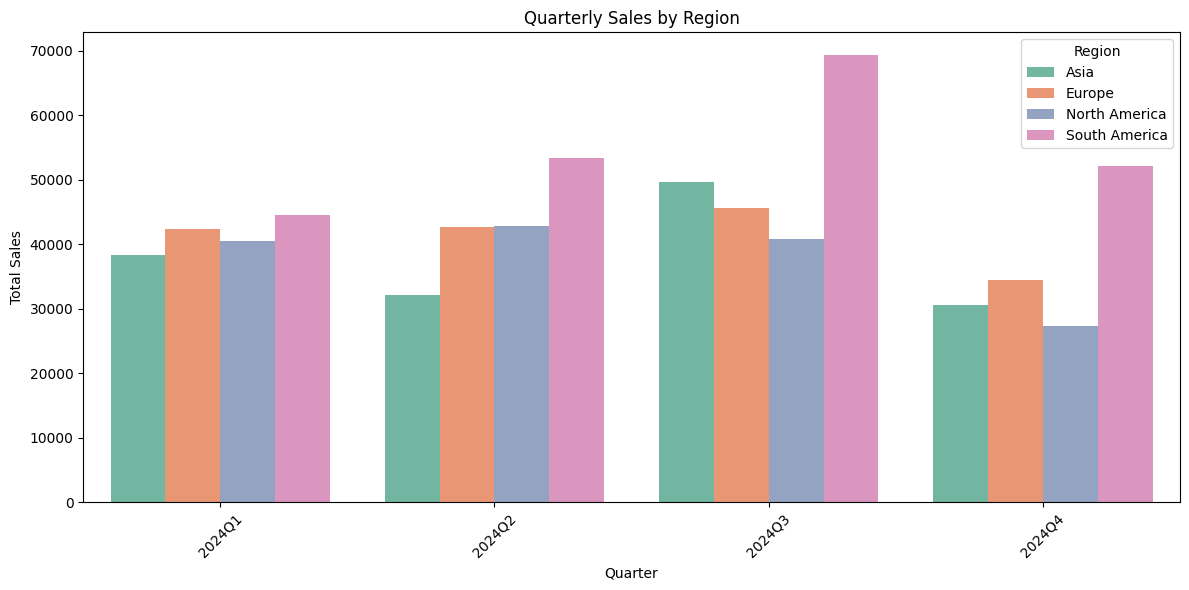

In [67]:


# Plot the quarterly sales for each region
plt.figure(figsize=(12, 6))
sns.barplot(
    data=quarterly_sales,
    x='Quarter',
    y='TotalValue',
    hue='Region',
    palette='Set2'
)
plt.title('Quarterly Sales by Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.legend(title='Region')
plt.tight_layout()
plt.show()


In [68]:
# Ensure TransactionDate is in datetime format
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

# Extract Quarter from TransactionDate
merged_df['Quarter'] = merged_df['TransactionDate'].dt.to_period('Q')

# Group by Quarter and ProductName to calculate the total quantity sold
quarterly_product_sales = (
    merged_df.groupby(['Quarter', 'ProductName'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(by=['Quarter', 'Quantity'], ascending=[True, False])
)

# Find the most sold products for each quarter
most_sold_products = quarterly_product_sales.groupby('Quarter').head(1)

# Display the results
print(most_sold_products)



    Quarter            ProductName  Quantity
35   2024Q1    HomeSense Desk Lamp        39
67   2024Q2      ActiveWear Jacket        26
136  2024Q3  ActiveWear Smartwatch        40
230  2024Q4      HomeSense T-Shirt        22


In [69]:
# Ensure TransactionDate is in datetime format
merged_df['TransactionDate'] = pd.to_datetime(merged_df['TransactionDate'])

# Extract Quarter from TransactionDate
merged_df['Quarter'] = merged_df['TransactionDate'].dt.to_period('Q')

# Group by Region, Quarter, and ProductName to calculate the total quantity sold
region_quarterly_product_sales = (
    merged_df.groupby(['Region', 'Quarter', 'ProductName'])['Quantity']
    .sum()
    .reset_index()
    .sort_values(by=['Region', 'Quarter', 'Quantity'], ascending=[True, True, False])
)

# Find the most sold product for each region and quarter
most_sold_products_region_quarter = (
    region_quarterly_product_sales.groupby(['Region', 'Quarter']).head(1)
)

# Display the results
print(most_sold_products_region_quarter)




            Region Quarter           ProductName  Quantity
19            Asia  2024Q1   HomeSense Desk Lamp        11
53            Asia  2024Q2     BookWorld Sweater        10
72            Asia  2024Q3     ActiveWear Jacket        13
130           Asia  2024Q4     HomeSense T-Shirt        17
143         Europe  2024Q1        ActiveWear Rug        11
190         Europe  2024Q2    BookWorld Cookbook        14
232         Europe  2024Q3         HomeSense Rug        12
281         Europe  2024Q4      TechPro Textbook        13
312  North America  2024Q1  SoundWave Headphones        13
327  North America  2024Q2     ActiveWear Jacket        13
387  North America  2024Q3     HomeSense Sweater        12
410  North America  2024Q4   BookWorld Biography        13
441  South America  2024Q1   ActiveWear Textbook        10
496  South America  2024Q2   HomeSense Desk Lamp        12
526  South America  2024Q3   ActiveWear Textbook        17
597  South America  2024Q4       SoundWave Novel        

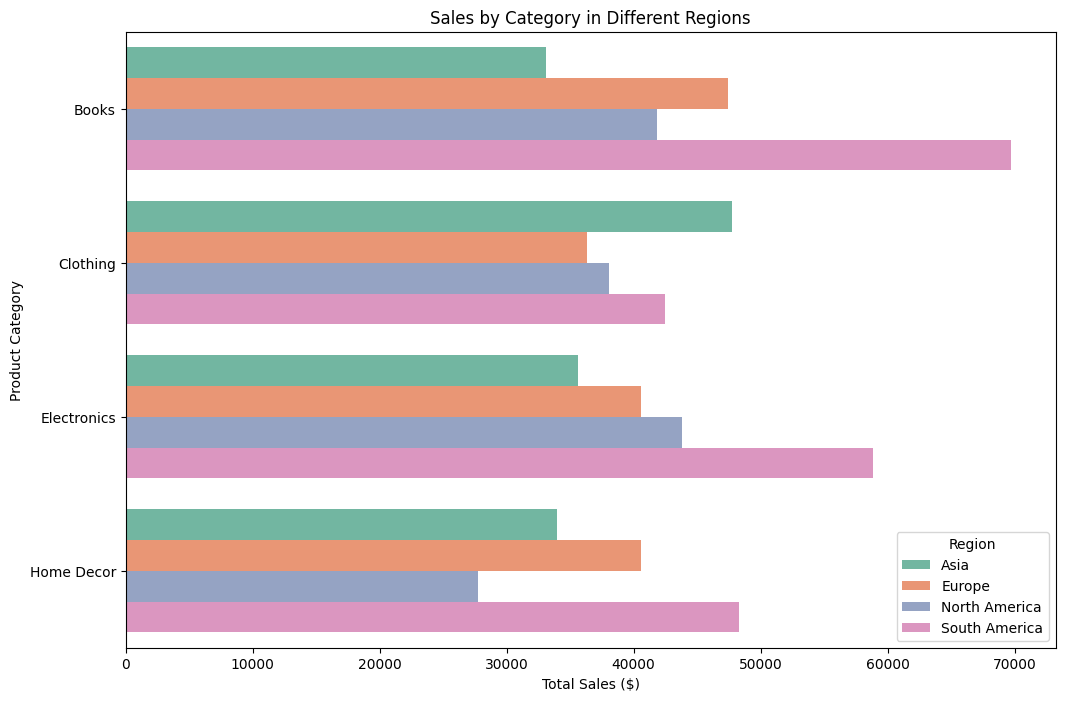

In [70]:
# Sales by category and region
category_region_sales = merged_df.groupby(['Region', 'Category'])['TotalValue'].sum().reset_index()

# Plotting sales by category per region
plt.figure(figsize=(12,8))
sns.barplot(x='TotalValue', y='Category', hue='Region', data=category_region_sales, palette='Set2')
plt.title("Sales by Category in Different Regions")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Category")
plt.show()

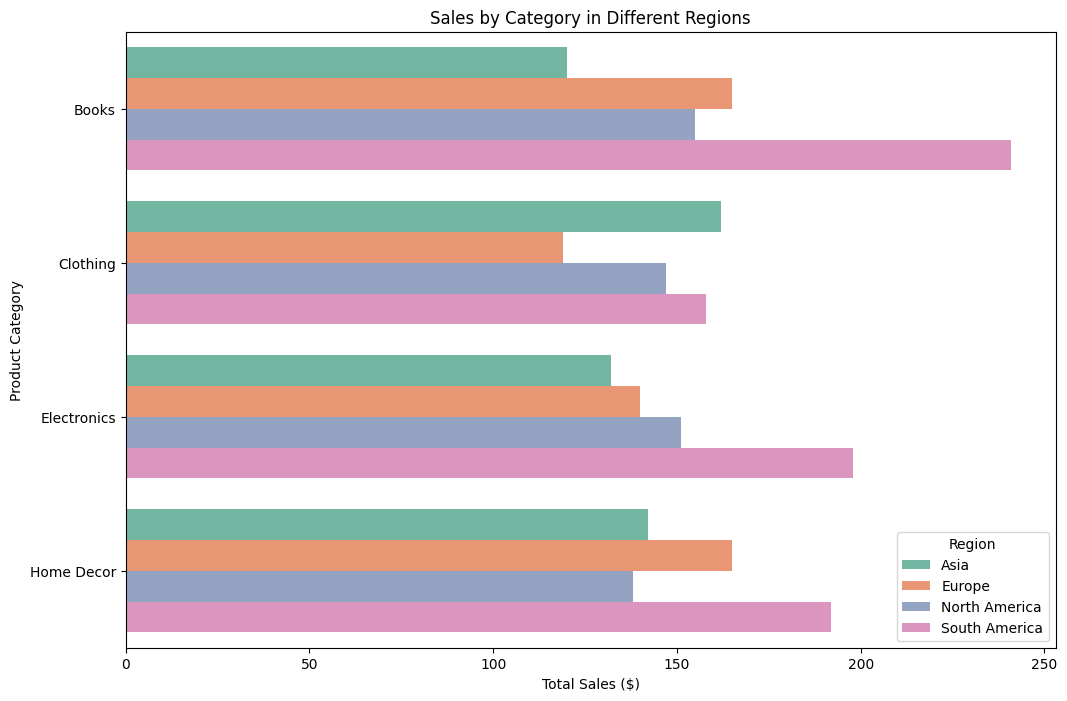

In [72]:
# Sales by category and region
category_region_sales = merged_df.groupby(['Region', 'Category'])['Quantity'].sum().reset_index()

# Plotting sales by category per region
plt.figure(figsize=(12,8))
sns.barplot(x='Quantity', y='Category', hue='Region', data=category_region_sales, palette='Set2')
plt.title("Sales by Category in Different Regions")
plt.xlabel("Total Sales ($)")
plt.ylabel("Product Category")
plt.show()

In [76]:
# Group by CustomerID to calculate transaction metrics
loyalty_df = (
    merged_df.groupby(['CustomerID', 'Region'], as_index=False)
    .agg(
        TransactionCount=('TransactionID', 'count'),  # Number of transactions
        LatestTransactionDate=('TransactionDate', 'max'),  # Most recent transaction date
        TotalValue=('TotalValue', 'sum')  # Total spending
    )
)

# Define loyalty thresholds
# Customers with more than 2 transactions and a recent transaction in 2024
loyal_customers = loyalty_df[
    (loyalty_df['TransactionCount'] > 6) &
    (loyalty_df['LatestTransactionDate'] >= '2024-01-01')
]

# Region-wise loyalty breakdown
region_loyalty = loyal_customers.groupby('Region').agg(
    LoyalCustomerCount=('CustomerID', 'count'),
    AvgSpending=('TotalValue', 'mean'),
    MaxSpending=('TotalValue', 'max')
).reset_index()

# Display results
print("Loyal Customers per Region:")
print(region_loyalty)


Loyal Customers per Region:
          Region  LoyalCustomerCount  AvgSpending  MaxSpending
0           Asia                  14  5536.104286      8040.39
1         Europe                   6  6071.923333     10673.87
2  North America                  14  4880.354286      7663.70
3  South America                  15  5692.702000      7572.91


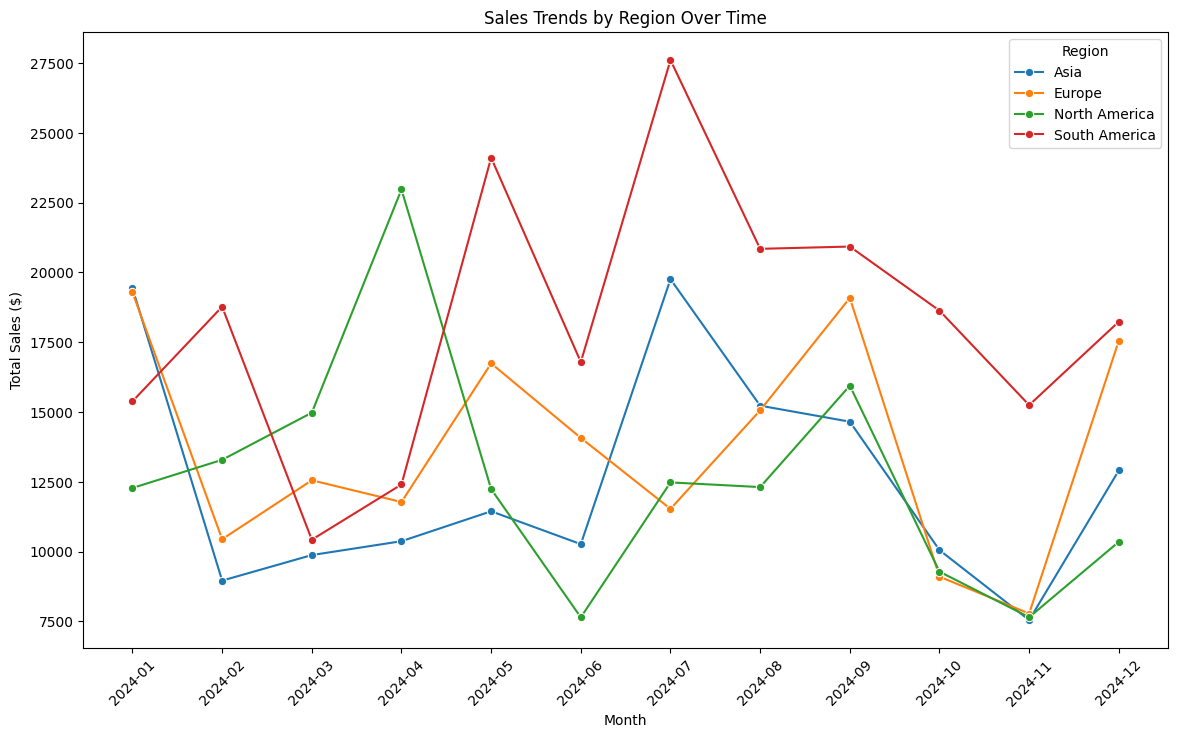

In [78]:
# Convert 'YearMonth' to string for better compatibility with plotting
merged_df['YearMonth'] = merged_df['YearMonth'].astype(str)

# Sales by month for each region
monthly_sales_region = merged_df.groupby(['Region', 'YearMonth'])['TotalValue'].sum().reset_index()

# Plotting sales trends by region
plt.figure(figsize=(14, 8))
sns.lineplot(x='YearMonth', y='TotalValue', hue='Region', data=monthly_sales_region, marker='o')
plt.title("Sales Trends by Region Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)
plt.show()


           Region    Month    HighestSellingProduct    Sales
0            Asia  2024-05  ActiveWear Cookware Set  2671.98
1            Asia  2024-07         ActiveWear Jeans  3005.03
2          Europe  2024-01      SoundWave Desk Lamp  1931.54
3          Europe  2024-03            SoundWave Rug  1343.36
4          Europe  2024-05        SoundWave T-Shirt  2890.68
5          Europe  2024-09       TechPro Headphones  3469.12
6          Europe  2024-12      ActiveWear Textbook  1879.08
7   North America  2024-04     SoundWave Smartwatch  3219.02
8   North America  2024-07     SoundWave Headphones  2365.75
9   North America  2024-09            TechPro Novel  2236.15
10  South America  2024-02           ActiveWear Rug  1669.48
11  South America  2024-05    ActiveWear Smartwatch  3135.83
12  South America  2024-07      ActiveWear Textbook  4388.64
13  South America  2024-09         ActiveWear Jeans  2575.74


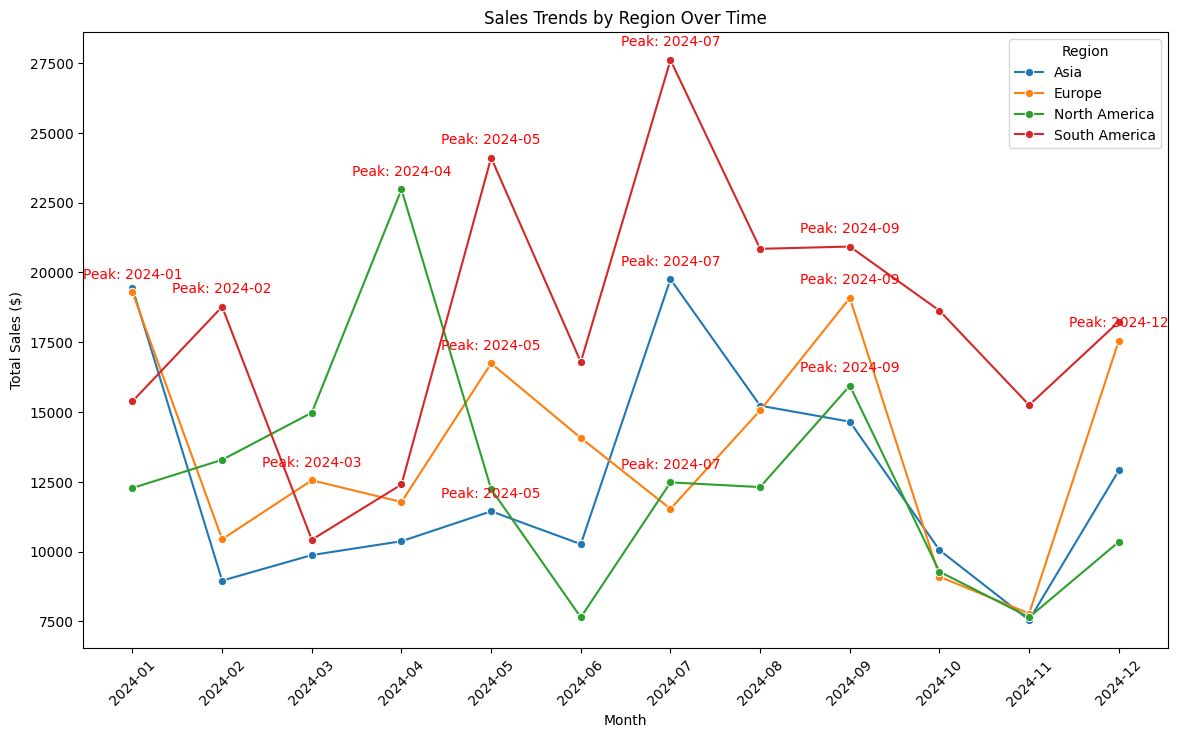

In [79]:


# Identify peaks (local maxima) in monthly sales
monthly_sales_region['SalesDiff'] = monthly_sales_region['TotalValue'].diff().fillna(0)
monthly_sales_region['Peak'] = (monthly_sales_region['SalesDiff'] > 0) & (monthly_sales_region['SalesDiff'].shift(-1) < 0)

# Filter out the rows with peaks
peaks_df = monthly_sales_region[monthly_sales_region['Peak']]

# For each peak, find the product with the highest sales in that period
highest_selling_products = []
for _, peak_row in peaks_df.iterrows():
    peak_region = peak_row['Region']
    peak_month = peak_row['YearMonth']
    
    # Filter transactions for that region and month
    peak_transactions = merged_df[(merged_df['Region'] == peak_region) & (merged_df['YearMonth'] == peak_month)]
    
    # Group by product and find the one with the highest total value
    product_sales = peak_transactions.groupby('ProductName')['TotalValue'].sum().reset_index()
    highest_product = product_sales.loc[product_sales['TotalValue'].idxmax()]
    
    highest_selling_products.append({
        'Region': peak_region,
        'Month': peak_month,
        'HighestSellingProduct': highest_product['ProductName'],
        'Sales': highest_product['TotalValue']
    })

# Convert to DataFrame for easy inspection
highest_selling_products_df = pd.DataFrame(highest_selling_products)

# Display the DataFrame
print(highest_selling_products_df)

# Plotting the sales trends again for context
plt.figure(figsize=(14,8))
sns.lineplot(x='YearMonth', y='TotalValue', hue='Region', data=monthly_sales_region, marker='o')
plt.title("Sales Trends by Region Over Time")
plt.xlabel("Month")
plt.ylabel("Total Sales ($)")
plt.xticks(rotation=45)

# Highlight peaks
for _, peak_row in peaks_df.iterrows():
    plt.annotate(f"Peak: {peak_row['YearMonth']}", 
                 (peak_row['YearMonth'], peak_row['TotalValue']), 
                 textcoords="offset points", xytext=(0, 10), ha='center', fontsize=10, color='red')

plt.show()


In [10]:
# 1. Best-selling product in each region
best_selling_per_region = merged_df.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()
best_selling_per_region = best_selling_per_region.loc[best_selling_per_region.groupby('Region')['Quantity'].idxmax()]
print("Best selling product in each region:\n", best_selling_per_region)

Best selling product in each region:
             Region            ProductName  Quantity
39            Asia      HomeSense T-Shirt        28
67          Europe         ActiveWear Rug        30
170  North America   SoundWave Headphones        37
196  South America  ActiveWear Smartwatch        38


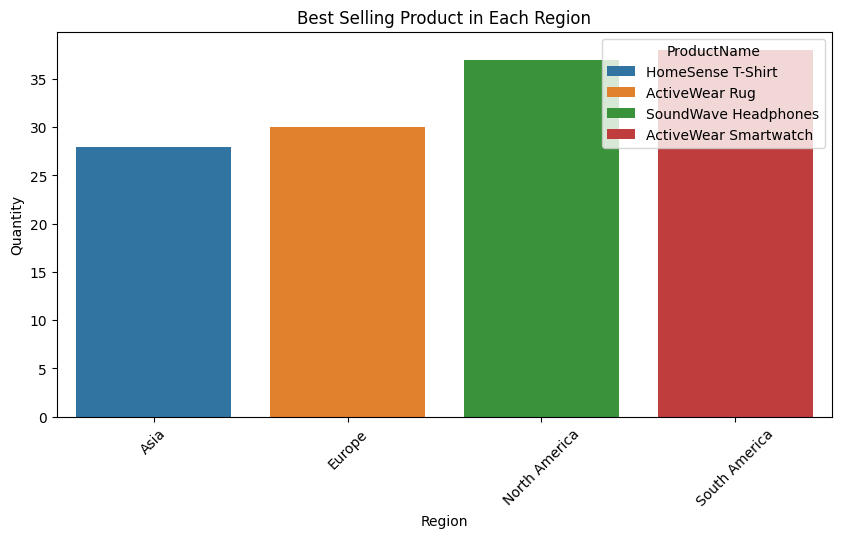

In [14]:

plt.figure(figsize=(10,5))
sns.barplot(data=best_selling_per_region, x='Region', y='Quantity', hue='ProductName')
plt.title("Best Selling Product in Each Region")
plt.xticks(rotation=45)
plt.show()

In [20]:
# 1. Best-selling category in each region
best_selling_per_region = merged_df.groupby(['Region','Category'])['Quantity'].sum().reset_index()
best_selling_per_region = best_selling_per_region.loc[best_selling_per_region.groupby('Region')['Quantity'].idxmax()]
print("Best selling product in each region:\n", best_selling_per_region)

Best selling product in each region:
            Region    Category  Quantity
1            Asia    Clothing       166
7          Europe  Home Decor       167
8   North America       Books       155
12  South America       Books       241


In [21]:
# 2. Most popular product across all regions
popular_product_all_regions = merged_df.groupby('ProductName')['Quantity'].sum().reset_index()
popular_product = popular_product_all_regions.loc[popular_product_all_regions['Quantity'].idxmax()]
print("Most popular product across all regions:", popular_product['ProductName'])

Most popular product across all regions: ActiveWear Smartwatch


C:\Users\Arya Anil\AppData\Local\Temp\ipykernel_24676\571513867.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_by_value, x='ProductName', y='TotalValue', palette='viridis')


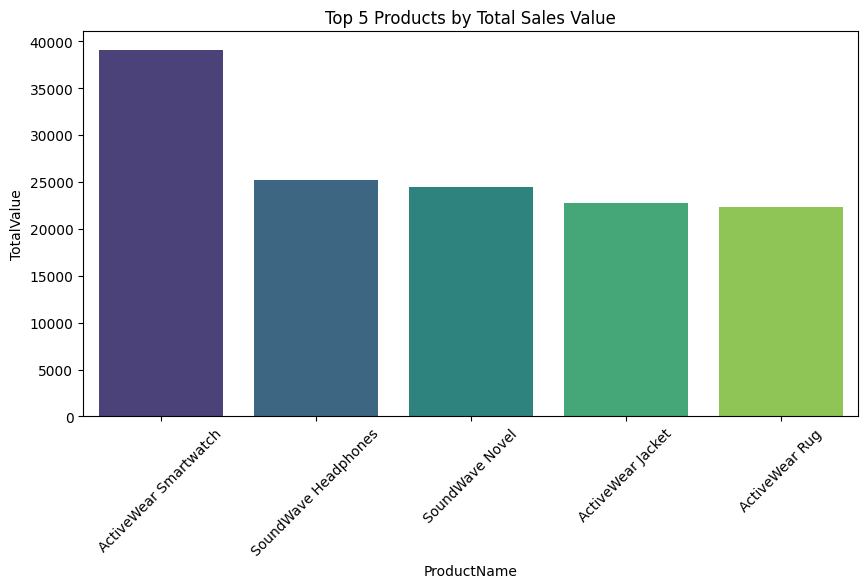

In [22]:
# 3. Top 5 products by total sales value
top5_by_value = merged_df.groupby('ProductName')['TotalValue'].sum().nlargest(5).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top5_by_value, x='ProductName', y='TotalValue', palette='viridis')
plt.title("Top 5 Products by Total Sales Value")
plt.xticks(rotation=45)
plt.show()


C:\Users\Arya Anil\AppData\Local\Temp\ipykernel_24676\3698329875.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top5_by_quantity, x='ProductName', y='Quantity', palette='magma')


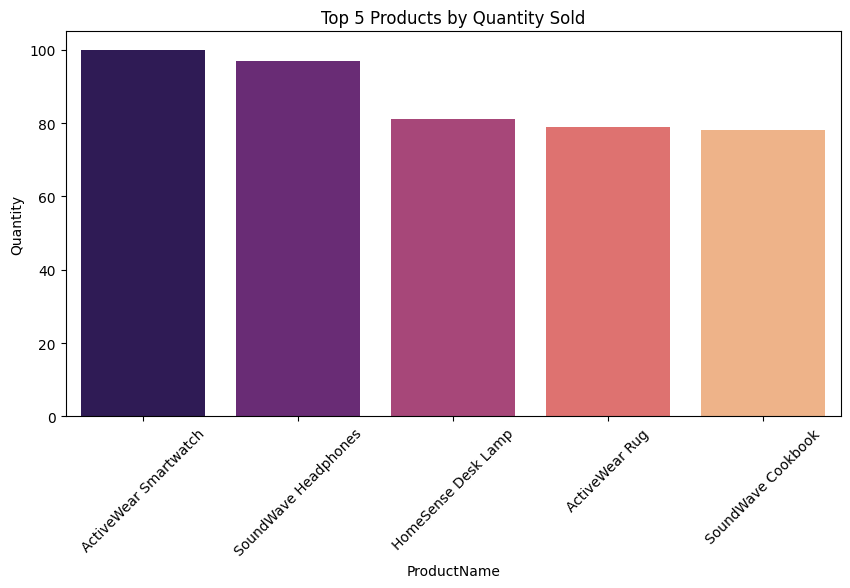

In [23]:
# 4. Top 5 products by quantity sold
top5_by_quantity = merged_df.groupby('ProductName')['Quantity'].sum().nlargest(5).reset_index()
plt.figure(figsize=(10,5))
sns.barplot(data=top5_by_quantity, x='ProductName', y='Quantity', palette='magma')
plt.title("Top 5 Products by Quantity Sold")
plt.xticks(rotation=45)
plt.show()